In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from PIL import Image

from tensorflow.keras.losses import MSE

In [2]:
panda = Image.open("../datasets/panda.jpg")

In [10]:
small = panda.resize((100, 100))

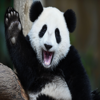

In [11]:
small

In [12]:
img = np.array(small).mean(axis=2)

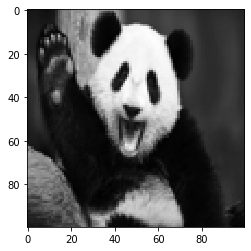

In [13]:
plt.imshow(img, cmap="gray")


In [14]:
orignal = img.flatten()


In [15]:
population = np.random.randint(0, 255, (1000, orignal.shape[0]))

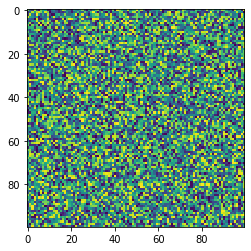

In [16]:
plt.imshow(population[0].reshape(*img.shape))

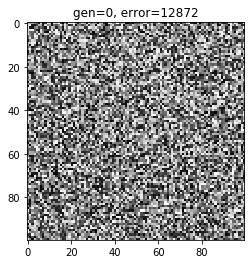

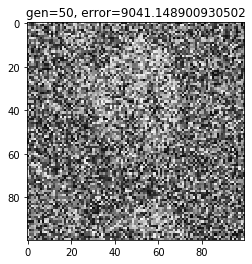

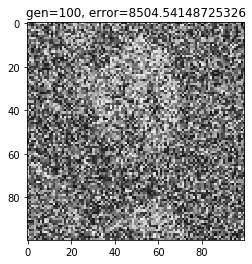

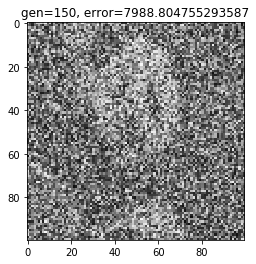

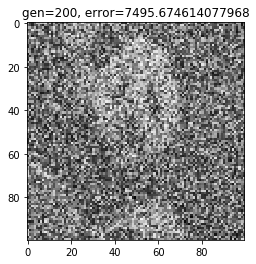

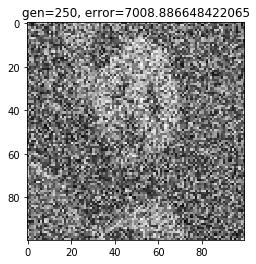

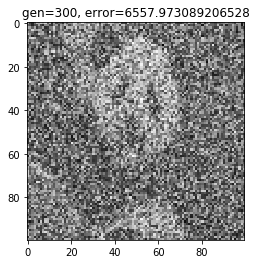

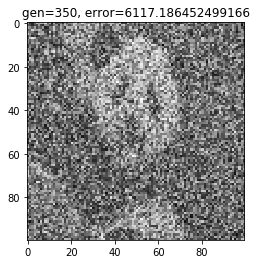

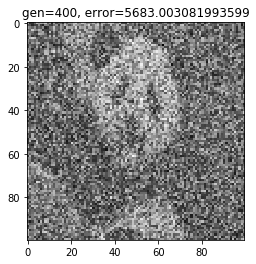

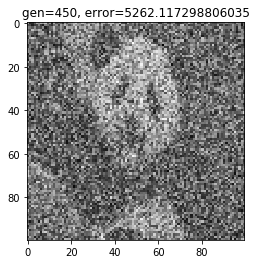

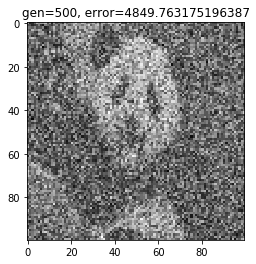

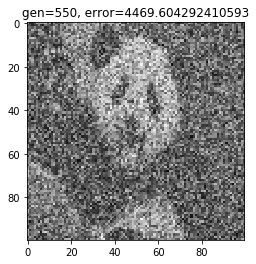

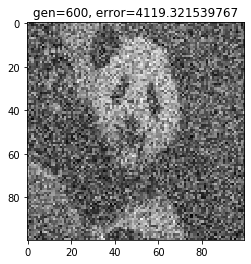

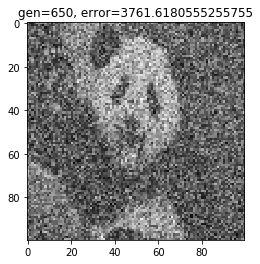

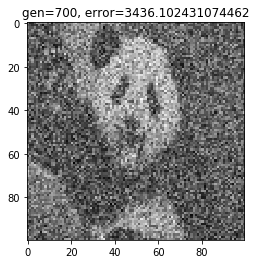

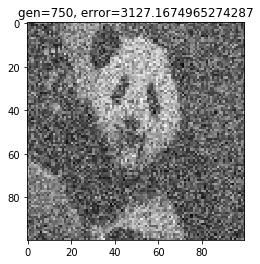

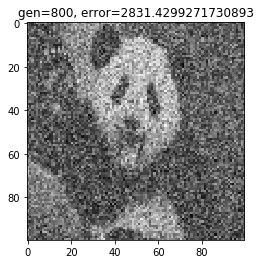

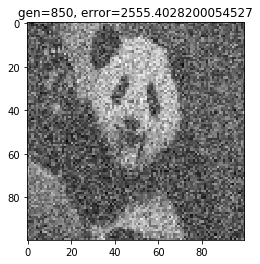

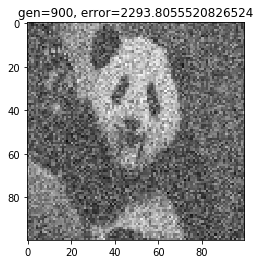

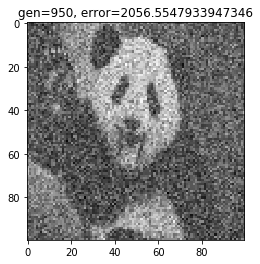

In [17]:
for generation in range(1000):
    errors = MSE(orignal, population).numpy()
    indices = errors.argsort()
    fit = population[indices[:10]]

    first = fit[np.random.randint(0, 10, 1000)]
    second = fit[np.random.randint(0, 10, 1000)]
    data = np.stack([first,second], axis=2)

    first_selector = np.random.randint(0, 2, population.shape)
    second_selector = 1 - first_selector
    selector = np.stack([first_selector, second_selector], axis=2)

    mutation = np.random.randn(*population.shape)
    population = (data * selector).sum(axis=2) + mutation
    
    if generation % 50 == 0:
        plt.figure()
        plt.title("gen={}, error={}".format(generation, str(errors[indices[0]])))
        plt.imshow(population[0].reshape(*img.shape), cmap="gray")
        plt.show()